In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 8. In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

(a) Create a random number generator and use its normal() method to generate a predictor X of length n = 100, as well as a noise vector " of length n = 100.

In [2]:
# 生成模擬數據
np.random.seed(0)
n = 100
X = np.random.normal(0, 1, n)  # 預測變數 X
epsilon = np.random.normal(0, 1, n)  # 噪聲項 epsilon

(b) Generate a response vector Y of length n = 100 according to
the model

In [3]:
beta_0, beta_1, beta_2, beta_3 = 3, 2, -1, 0.5
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon

(c) Use forward stepwise selection in order to select a model containing the predictors X, X2,...,X10. What is the model obtained according to Cp? Report the coefcients of the model obtained.

In [4]:
# 擴展 X 為多項式特徵
X_poly = np.column_stack([X**i for i in range(1, 11)])

In [5]:
model = LinearRegression()
sfs_forward = SequentialFeatureSelector(model, n_features_to_select="auto", direction="forward", scoring="neg_mean_squared_error", cv=5)
sfs_forward.fit(X_poly, Y)
selected_features_forward = sfs_forward.get_support(indices=True)
print("Forward Stepwise Selection - Selected Features:", selected_features_forward)

# 訓練模型並打印係數
model.fit(X_poly[:, selected_features_forward], Y)
print("Coefficients (Forward Stepwise Selection):", model.coef_)

Forward Stepwise Selection - Selected Features: [0 1 2 3 9]
Coefficients (Forward Stepwise Selection): [ 2.11922789e+00 -1.30667377e+00  5.05776437e-01  5.36204065e-02
  5.87283041e-06]


(d) Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?

In [6]:
sfs_backward = SequentialFeatureSelector(model, n_features_to_select="auto", direction="backward", scoring="neg_mean_squared_error", cv=5)
sfs_backward.fit(X_poly, Y)
selected_features_backward = sfs_backward.get_support(indices=True)
print("Backward Stepwise Selection - Selected Features:", selected_features_backward)

# 訓練模型並 print 出係數
model.fit(X_poly[:, selected_features_backward], Y)
print("Coefficients (Backward Stepwise Selection):", model.coef_)

Backward Stepwise Selection - Selected Features: [0 1 2 3 8]
Coefficients (Backward Stepwise Selection): [ 1.93907571e+00 -1.22789627e+00  6.21751567e-01  2.54098929e-02
 -5.69698580e-04]


(e) Now fit a lasso model to the simulated data, again using X, X2, ...,X10 as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the results obtained.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2060726097865881, tolerance: 0.12992719588908103
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23528218124238265, tolerance: 0.12992719588908103
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23927316397436016, tolerance: 0.12992719588908103
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: Con

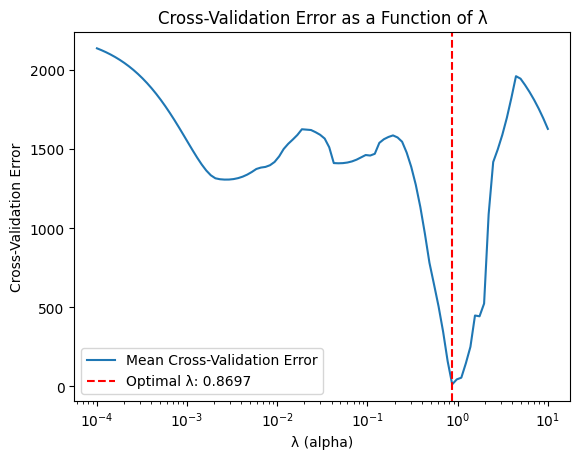

Optimal λ (alpha): 0.8697490026177834
Lasso Coefficients: [ 0.         -0.          0.18161016 -0.          0.42112812 -0.10044133
  0.         -0.         -0.00871747  0.00147435]


In [8]:
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, random_state=0)
lasso_cv.fit(X_poly, Y)

plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), label="Mean Cross-Validation Error")
plt.xscale("log")
plt.xlabel("λ (alpha)")
plt.ylabel("Cross-Validation Error")
plt.title("Cross-Validation Error as a Function of λ")
plt.axvline(lasso_cv.alpha_, color="red", linestyle="--", label=f"Optimal λ: {lasso_cv.alpha_:.4f}")
plt.legend()
plt.show()

lasso_coefficients = lasso_cv.coef_
print("Optimal λ (alpha):", lasso_cv.alpha_)
print("Lasso Coefficients:", lasso_coefficients)

(f) Now generate a response vector Y according to the model Y = β0 + β7X^7 + e, and perform forward stepwise selection and the lasso. Discuss the results obtained.

In [10]:
beta_0_new = 1
beta_7_new = 2
Y_new = beta_0_new + beta_7_new * X**7 + epsilon

sfs_forward_new = SequentialFeatureSelector(model, n_features_to_select="auto", direction="forward", scoring="neg_mean_squared_error", cv=5)
sfs_forward_new.fit(X_poly, Y_new)
selected_features_forward_new = sfs_forward_new.get_support()

print("Selected features (forward selection):", selected_features_forward_new)

lasso_cv_new = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, random_state=0)
lasso_cv_new.fit(X_poly, Y_new)
lasso_coefficients_new = lasso_cv_new.coef_

print("Optimal λ (alpha):", lasso_cv_new.alpha_)
print("Lasso Coefficients:", lasso_coefficients_new)

print("\nThe only significant predictor variable in the forward stepwise selection is X^7.")
print("It is possible that the noise affected the Lasso model, preventing it from accurately selecting 𝑋^7 as the most important variable.")

Selected features (forward selection): [ True  True  True  True False False  True False False False]
Optimal λ (alpha): 0.12045035402587824
Lasso Coefficients: [-0.         -0.         -1.75411383  0.05641281  2.67258233 -0.04128383
  1.02942663 -0.01088742  0.09795125  0.00464488]

The only significant predictor variable in the forward stepwise selection is X^7.
It is possible that the noise affected the Lasso model, preventing it from accurately selecting 𝑋^7 as the most important variable.
